In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.shape

(200000, 9)

In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
df.sample(4)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
14449,12584586,2014-07-07 13:27:12.0000004,5.5,2014-07-07 13:27:12 UTC,-73.963307,40.769269,-73.964493,40.758892,1
53766,48516602,2012-02-11 20:55:23.0000002,8.1,2012-02-11 20:55:23 UTC,-73.961907,40.780753,-73.985109,40.752884,1
51513,39828322,2009-09-24 23:53:00.000000112,4.5,2009-09-24 23:53:00 UTC,-74.000905,40.736823,-73.995362,40.744945,1
128417,18573246,2012-10-13 22:40:00.000000126,14.0,2012-10-13 22:40:00 UTC,-73.990102,40.767030,-73.983807,40.739277,5


In [8]:
df = df.drop(['Unnamed: 0','key','pickup_datetime'],axis=1)

In [9]:
df.sample(2)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
161427,10.0,-73.953728,40.674236,-73.981331,40.686340,1
191360,4.5,-73.968746,40.761529,-73.977894,40.763447,1


In [10]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

<Axes: >

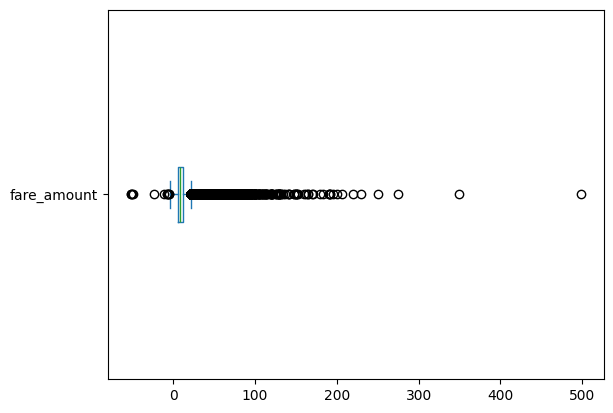

In [13]:
df['fare_amount'].plot.box(vert=False)

In [14]:
q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)
IOR = q3-q1

In [15]:
lb = q1 - 1.5*IOR
ub = q3 + 1.5*IOR
df = df[(df['fare_amount']>=lb)&(df['fare_amount']<=ub)]

<Axes: >

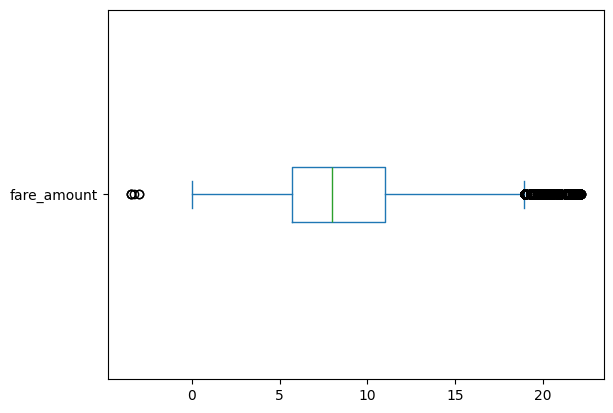

In [16]:
df['fare_amount'].plot.box(vert=False)

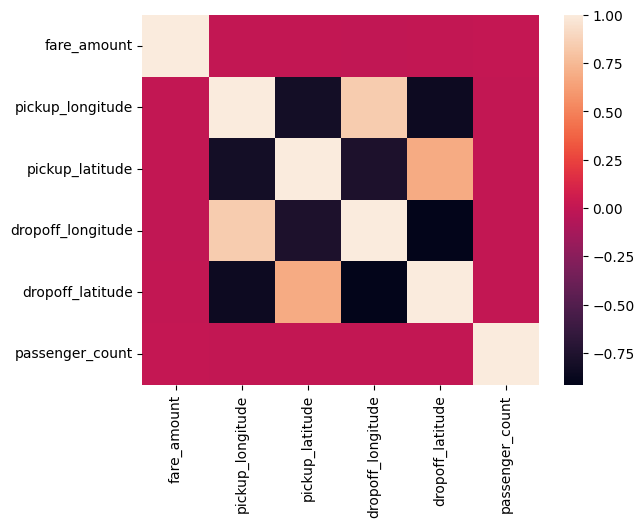

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
cor_mat = df.corr()
sns.heatmap(cor_mat)
plt.show()

In [21]:
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
Y = df['fare_amount']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lrm = LinearRegression()

In [26]:
lrm.fit(x_train,y_train)

LinearRegression()

In [28]:
from sklearn.ensemble import RandomForestRegressor
rfm = RandomForestRegressor(n_estimators=100, random_state=42)


In [30]:
rfm.fit(x_train,y_train)
ypre = lrm.predict(x_test)


In [31]:
yrpre = rfm.predict(x_test)


In [34]:
from sklearn.metrics import r2_score,mean_squared_error
r2l2 = r2_score(y_test,ypre)
import numpy as np

In [35]:
rmse_lr = np.sqrt(mean_squared_error(y_test, ypre))

In [36]:
print(r2l2)


8.29713376748753e-05


In [37]:
print(rmse_lr)


4.136624287486402
